In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [6]:
df = pd.read_csv('/content/diabetes.csv')
display(df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


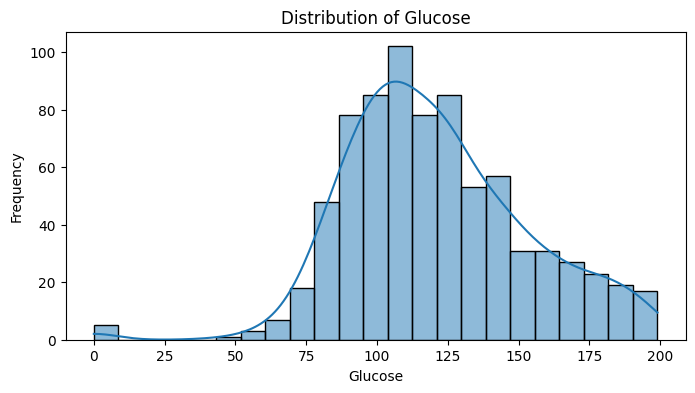

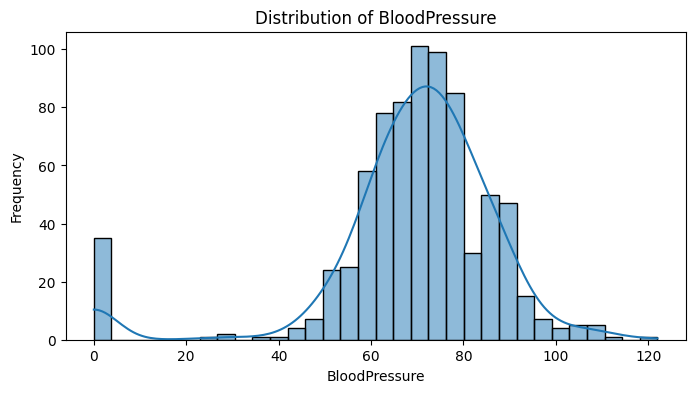

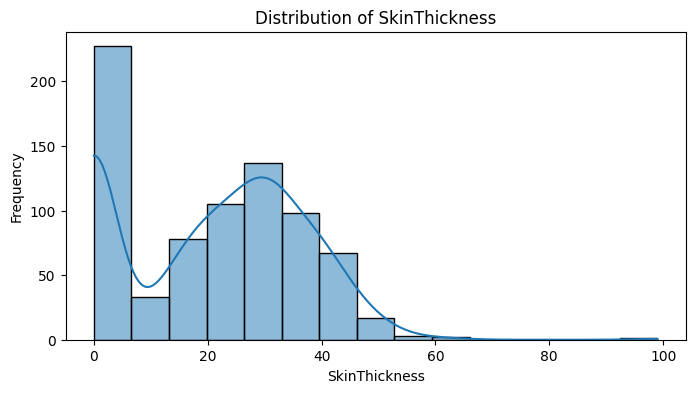

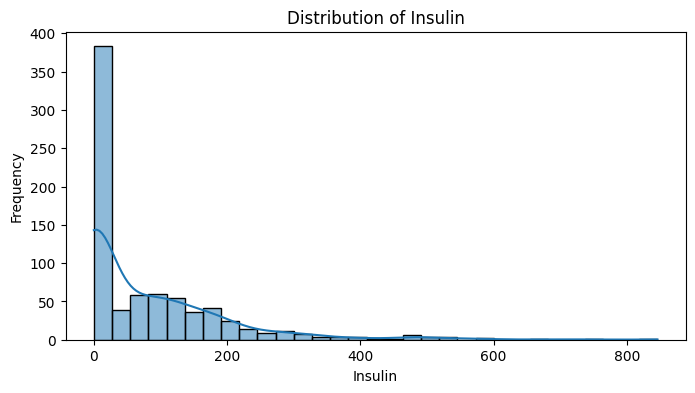

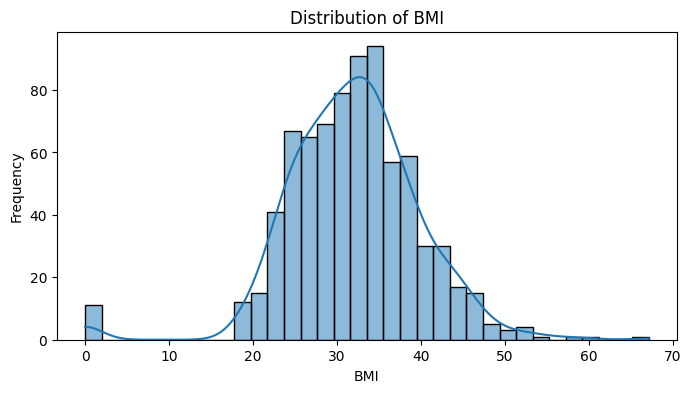

In [9]:
features_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for feature in features_with_zeros:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [11]:
df[features_with_zeros] = df[features_with_zeros].replace(0, np.nan)

for feature in features_with_zeros:
    median_val = df[feature].median()
    df[feature].fillna(median_val, inplace=True)

display(df.head())

/tmp/ipython-input-159119685.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[feature].fillna(median_val, inplace=True)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Outcome', axis=1)
y = df['Outcome']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = Sequential()
model.add(Dense(12, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(X_train_scaled, y_train, epochs=150, batch_size=10, validation_split=0.2)

Epoch 1/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.3979 - loss: 0.7405 - val_accuracy: 0.6341 - val_loss: 0.6451
Epoch 2/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7057 - loss: 0.6447 - val_accuracy: 0.7236 - val_loss: 0.5929
Epoch 3/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7780 - loss: 0.5761 - val_accuracy: 0.7480 - val_loss: 0.5554
Epoch 4/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7556 - loss: 0.5414 - val_accuracy: 0.7398 - val_loss: 0.5265
Epoch 5/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7763 - loss: 0.5119 - val_accuracy: 0.7561 - val_loss: 0.5087
Epoch 6/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7567 - loss: 0.5095 - val_accuracy: 0.7642 - val_loss: 0.4925
Epoch 7/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7988 - loss: 0.4750 - val_accuracy: 0.7724 - val_loss: 0.4819
Epoch 8/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7712 - loss: 0.4815 - val_accuracy: 0.7642 - 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 665 (2.60 KB)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 444 (1.74 KB)

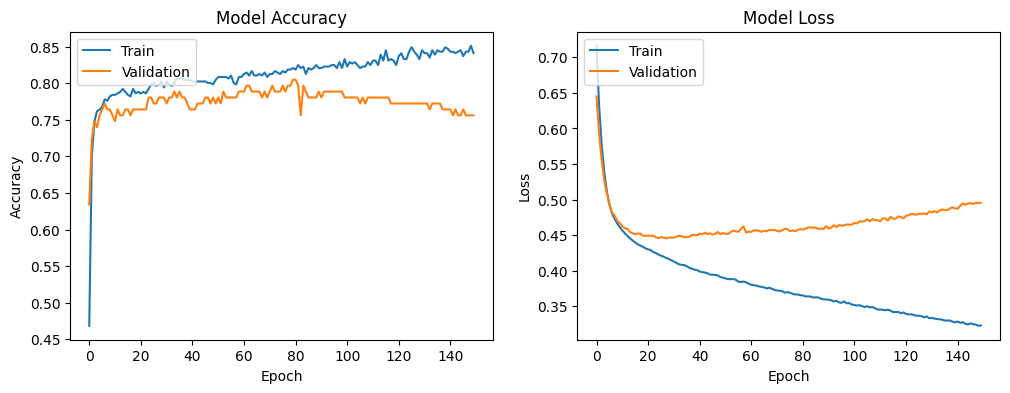

In [16]:
model.summary()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [17]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test Loss: {loss:.4f}')

Test Accuracy: 0.7013
Test Loss: 0.6960


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.4789 - loss: 0.7942 - val_accuracy: 0.6911 - val_loss: 0.5985
Epoch 2/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6117 - loss: 0.6354 - val_accuracy: 0.7317 - val_loss: 0.5649
Epoch 3/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6314 - loss: 0.6058 - val_accuracy: 0.7480 - val_loss: 0.5382
Epoch 4/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7764 - loss: 0.5136 - val_accuracy: 0.7561 - val_loss: 0.5171
Epoch 5/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7436 - loss: 0.5403 - val_accuracy: 0.7480 - val_loss: 0.5009
Epoch 6/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7017 - loss: 0.5658 - val_accuracy: 0.7480 - val_loss: 0.4943
Epoch 7/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7393 - loss: 0.5182 - val_accuracy: 0.7561 - val_loss: 0.4860
Epoch 8/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7226 - loss: 0.5241 - val_accuracy: 0.7480 - 

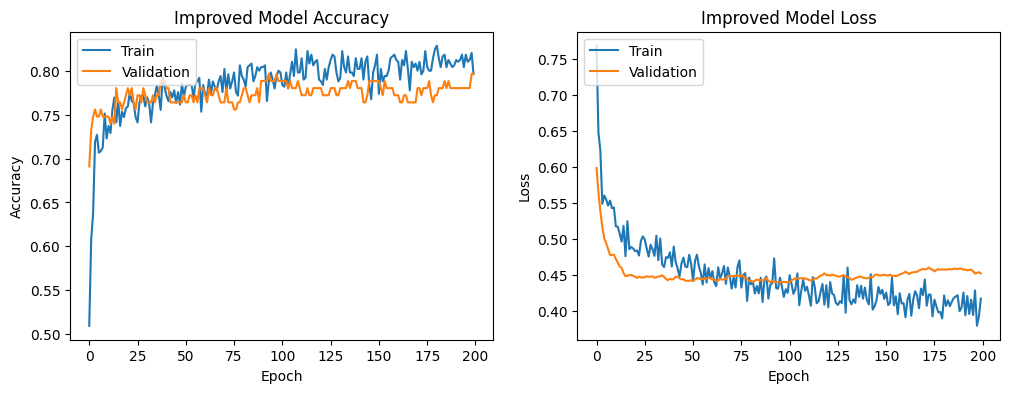

In [18]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(32, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_improved = model.fit(X_train_scaled, y_train, epochs=200, batch_size=10, validation_split=0.2)

loss_improved, accuracy_improved = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Improved Test Accuracy: {accuracy_improved:.4f}')
print(f'Improved Test Loss: {loss_improved:.4f}')

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_improved.history['accuracy'])
plt.plot(history_improved.history['val_accuracy'])
plt.title('Improved Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_improved.history['loss'])
plt.plot(history_improved.history['val_loss'])
plt.title('Improved Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype("int32")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.79        99
           1       0.63      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154


Confusion Matrix:
[[79 20]
 [21 34]]


In [21]:
def predict_with_custom_values(model, scaler, custom_values):
    custom_data = pd.DataFrame([custom_values], columns=X.columns)

    custom_data_scaled = scaler.transform(custom_data)

    prediction_prob = model.predict(custom_data_scaled)
    prediction = (prediction_prob > 0.5).astype("int32")

    if prediction[0] == 1:
        print("\nPrediction: Based on the custom input, the model predicts that the person is likely to have diabetes.")
    else:
        print("\nPrediction: Based on the custom input, the model predicts that the person is unlikely to have diabetes.")

custom_input_values = [3, 180, 85, 45, 250, 40.5, 0.8, 45]

print(f"Using custom input values: {custom_input_values}")
predict_with_custom_values(model, scaler, custom_input_values)

Using custom input values: [3, 180, 85, 45, 250, 40.5, 0.8, 45]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step

Prediction: Based on the custom input, the model predicts that the person is likely to have diabetes.


In [22]:
import pickle

filename = 'diabetes_model.pkl'
pickle.dump(model, open(filename, 'wb'))

print(f"Model saved to {filename}")

Model saved to diabetes_model.pkl
